# Group 20 - Question 3 - Data Curation

- **Author:** Max Haussmann (72633)
- **Last updated:** 2025-11-29  
- **Description:** Data curation and geographic mapping of Olympic athlete participation.

In this notebook I will perform some additional data curation to prepare the dataset for visualization and exploring the question: Does Location Shape Success? The Geography of Olympic Performance.
Additional steps performed include:
- Gathering data about the host city
- Gathering data about athletes home countries
- Adding additional columns to simplify visualization

I will calculate the distance an athlete traveled to the host city. To simplify this, I focus on the distance from an athlet's home country's capital to the host city. To perform this calculation I merged an additional dataset, including latitude and longitude of capital cities. This additional dataset can be found and accessed here: https://gist.github.com/ofou/df09a6834a8421b4f376c875194915c9 

# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/max/Desktop/2609_DataVisualization/TeamProject/G20-DV4BA-Final/summer_olympics_base.csv')

# Show the first few rows of the dataframe
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_Winner,total_medals,BMI,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0,0,24.691358,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0,0,20.761246,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,0,0,NaN,Denmark,NaN
3,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal,0,0,NaN,Netherlands,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,No Medal,0,0,NaN,Netherlands,NaN


In [2]:
# Rename region to athlete_country
df.rename(columns={'region': 'Athlete_Country'}, inplace=True)

**Note:**
Use pycountry_convert to map each athlete's country name (from 'Athlete_Country') to its continent. Add column 'Athlete_Continent'. This helps classify athletes by continent, leveraging pycountry_convert's country-to-continent lookup functions.

In [3]:
# %pip install pycountry_convert

In [4]:
# Import necessary functions from pycountry_convert
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2


# Map country names to continents
continent_map = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Oceania',
    'AF': 'Africa',
    'EU': 'Europe'
}

# Function to get continent from country name
def get_continent(country_name):
    try:
        country_code = country_name_to_country_alpha2(country_name)
        continent_code = country_alpha2_to_continent_code(country_code)
        return continent_map[continent_code]
    except:
        return None

# Apply to your dataframe
df['Athlete_Continent'] = df['Athlete_Country'].apply(get_continent)

# Check which countries failed to map
print("No continent mapping for the following countries:")
unmapped = df[df['Athlete_Continent'].isna()]['Athlete_Country'].unique()
print(unmapped)

No continent mapping for the following countries:
['Republic of Congo' 'UK' 'Saint Kitts' 'Trinidad' 'Saint Vincent'
 'Curacao' nan 'Individual Olympic Athletes' 'Virgin Islands, US'
 'Timor-Leste' 'Boliva' 'Antigua' 'Kosovo']


In [5]:
# Map missing countries manually
manual_map = {
    'UK': 'Europe',
    'Antigua': 'North America',
    'Trinidad': 'North America',
    'Timor-Leste': 'Asia',
    'Saint Kitts': 'North America',
    'Kosovo': 'Europe',
    'Individual Olympic Athletes': None,
    'Saint Vincent': 'North America',
    'Republic of Congo': 'Africa',
    'Curacao': 'North America',
    'Boliva': 'South America',
    'Virgin Islands, US': 'North America'
}

# Function to fix manual mappings
def fix_manual_mapping(region):
    if pd.isna(region):
        return None
    return manual_map.get(region, None)

# Apply manual mapping to missing values
df.loc[df['Athlete_Continent'].isna(), 'Athlete_Continent'] = df.loc[df['Athlete_Continent'].isna(), 
                                                                     'Athlete_Country'].apply(fix_manual_mapping)

In [6]:
# Display the updated dataframe with the new continent column
df[['Team', 'NOC', 'Athlete_Country', 'Athlete_Continent']].head(10)

,Team,NOC,Athlete_Country,Athlete_Continent
0,China,CHN,China,Asia
1,China,CHN,China,Asia
2,Denmark,DEN,Denmark,Europe
3,Netherlands,NED,Netherlands,Europe
4,Netherlands,NED,Netherlands,Europe
5,Finland,FIN,Finland,Europe
6,Finland,FIN,Finland,Europe
7,Finland,FIN,Finland,Europe
8,Finland,FIN,Finland,Europe
9,Finland,FIN,Finland,Europe


In [7]:
# Rename City to Host_City
df.rename(columns={'City': 'Host_City'}, inplace=True)

# Show unique host cities
df['Host_City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Los Angeles', 'Helsinki',
       'Atlanta', 'Sydney', 'Stockholm', 'Paris', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

**Note:**

There are only 23 unique host city. Manual mapping is the most straightforward approach here.

In [8]:
# Host city to country mapping
host_city_to_country = {
    'Barcelona': 'Spain',
    'London': 'United Kingdom',
    'Antwerpen': 'Belgium',
    'Paris': 'France',
    'Los Angeles': 'United States',
    'Helsinki': 'Finland',
    'Sydney': 'Australia',
    'Atlanta': 'United States',
    'Stockholm': 'Sweden',
    'Beijing': 'China',
    'Rio de Janeiro': 'Brazil',
    'Athina': 'Greece',
    'Mexico City': 'Mexico',
    'Munich': 'Germany',
    'Seoul': 'South Korea',
    'Berlin': 'Germany',
    'Melbourne': 'Australia',
    'Roma': 'Italy',
    'Amsterdam': 'Netherlands',
    'Montreal': 'Canada',
    'Moskva': 'Russia',
    'Tokyo': 'Japan',
    'St. Louis': 'United States'
}

# Host city to continent mapping
host_city_to_continent = {
    'Barcelona': 'Europe',
    'London': 'Europe',
    'Antwerpen': 'Europe',
    'Paris': 'Europe',
    'Los Angeles': 'North America',
    'Helsinki': 'Europe',
    'Sydney': 'Oceania',
    'Atlanta': 'North America',
    'Stockholm': 'Europe',
    'Beijing': 'Asia',
    'Rio de Janeiro': 'South America',
    'Athina': 'Europe',  # Athens in Greek
    'Mexico City': 'North America',
    'Munich': 'Europe',
    'Seoul': 'Asia',
    'Berlin': 'Europe',
    'Melbourne': 'Oceania',
    'Roma': 'Europe',  # Rome in Italian
    'Amsterdam': 'Europe',
    'Montreal': 'North America',
    'Moskva': 'Europe',  # Moscow in Russian
    'Tokyo': 'Asia',
    'St. Louis': 'North America'
}

# Apply the mappings
df['Host_Continent'] = df['Host_City'].map(host_city_to_continent)
df['Host_Country'] = df['Host_City'].map(host_city_to_country)

# Display the updated dataframe with new host columns
df[['Host_City', 'Host_Country', 'Host_Continent']].head(10)

,Host_City,Host_Country,Host_Continent
0,Barcelona,Spain,Europe
1,London,United Kingdom,Europe
2,Antwerpen,Belgium,Europe
3,Los Angeles,United States,North America
4,Los Angeles,United States,North America
5,Helsinki,Finland,Europe
6,Atlanta,United States,North America
7,Sydney,Australia,Oceania
8,Stockholm,Sweden,Europe
9,Stockholm,Sweden,Europe


In [9]:
# Check the location advantage - Add columns for clarity
# Is the athlete from the host country?
df['Is_Host_Country'] = df['Athlete_Country'] == df['Host_Country']

# Is the athlete from the host continent?
df['Is_Host_Continent'] = df['Athlete_Continent'] == df['Host_Continent']

# Create a categorical field for location advantage
def location_advantage(row):
    if row['Is_Host_Country']:
        return 'Host Country'
    elif row['Is_Host_Continent']:
        return 'Host Continent'
    else:
        return 'Other'

df['Location_Advantage'] = df.apply(location_advantage, axis=1)

# Display the relevant columns to verify
df[['Athlete_Country', 'Athlete_Continent', 'Host_City', 'Host_Country',
    'Host_Continent', 'Is_Host_Country', 'Is_Host_Continent', 'Location_Advantage']].head(10)   

,Athlete_Country,Athlete_Continent,Host_City,Host_Country,Host_Continent,Is_Host_Country,Is_Host_Continent,Location_Advantage
0,China,Asia,Barcelona,Spain,Europe,False,False,Other
1,China,Asia,London,United Kingdom,Europe,False,False,Other
2,Denmark,Europe,Antwerpen,Belgium,Europe,False,True,Host Continent
3,Netherlands,Europe,Los Angeles,United States,North America,False,False,Other
4,Netherlands,Europe,Los Angeles,United States,North America,False,False,Other
5,Finland,Europe,Helsinki,Finland,Europe,True,True,Host Country
6,Finland,Europe,Atlanta,United States,North America,False,False,Other
7,Finland,Europe,Sydney,Australia,Oceania,False,False,Other
8,Finland,Europe,Stockholm,Sweden,Europe,False,True,Host Continent
9,Finland,Europe,Stockholm,Sweden,Europe,False,True,Host Continent


In [10]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'Host_City', 'Sport', 'Event', 'Medal',
       'Medal_Winner', 'total_medals', 'BMI', 'Athlete_Country', 'notes',
       'Athlete_Continent', 'Host_Continent', 'Host_Country',
       'Is_Host_Country', 'Is_Host_Continent', 'Location_Advantage'],
      dtype='object')

# Distance Calculation

To calculate the distance, I focus on latitude and longitude of the athlete's home country capital and the geographical location of the host city.

**Note:**
Mapping for the 23 host cities is done manually.

In [11]:
# Data for the Summer Olympic Host Cities (City, Latitude, Longitude)
host_city_data = {
    'Host_City': ['Seoul', 'London', 'Los Angeles', 'Mexico City', 'Beijing', 'Montreal', 'Atlanta', 'Tokyo', 'Sydney', 'Melbourne', 'Rio de Janeiro', 'Roma', 'Munich', 'Moskva', 'Barcelona', 'Athina', 'Helsinki', 'Stockholm', 'Antwerpen', 'Paris', 'Amsterdam', 'Berlin', 'St. Louis'],
    'Host_City_Latitude': [37.56, 51.51, 34.05, 19.43, 39.90, 45.50, 33.75, 35.68, -33.87, -37.81, -22.91, 41.90, 48.14, 55.75, 41.38, 37.98, 60.17, 59.33, 51.22, 48.86, 52.37, 52.52, 38.63],
    'Host_City_Longitude': [127.00, -0.13, -118.24, -99.13, 116.41, -73.57, -84.39, 139.70, 151.21, 144.96, -43.21, 12.50, 11.58, 37.62, 2.17, 23.73, 24.94, 18.06, 4.40, 2.35, 4.90, 13.40, -90.20]
}

# Create the Host City DataFrame
host_df = pd.DataFrame(host_city_data)

print("Host City DataFrame (host_df) Head:")
print(host_df.head())

Host City DataFrame (host_df) Head:
     Host_City  Host_City_Latitude  Host_City_Longitude
0        Seoul               37.56               127.00
1       London               51.51                -0.13
2  Los Angeles               34.05              -118.24
3  Mexico City               19.43               -99.13
4      Beijing               39.90               116.41


In [12]:
# Merge Host City dataframe with Olympic dataset
df = pd.merge(df, host_df, left_on='Host_City', right_on='Host_City', how='left')

# Display the first few rows
display(df[['Host_City',  'Host_City_Latitude', 'Host_City_Longitude']].head(10))

,Host_City,Host_City_Latitude,Host_City_Longitude
0,Barcelona,41.38,2.17
1,London,51.51,-0.13
2,Antwerpen,51.22,4.40
3,Los Angeles,34.05,-118.24
4,Los Angeles,34.05,-118.24
5,Helsinki,60.17,24.94
6,Atlanta,33.75,-84.39
7,Sydney,-33.87,151.21
8,Stockholm,59.33,18.06
9,Stockholm,59.33,18.06


#### Gathering data for athlete capitals

In [13]:
# Using CountryInfo to merge additional capital cities on countries
%pip install countryinfo

Note: you may need to restart the kernel to use updated packages.


In [14]:
from countryinfo import CountryInfo

# Getting unique countries
all_regions = df['Athlete_Country'].unique()

# Create a DataFrame to hold country and capital
df_athlete_region= pd.DataFrame({'country': all_regions})

# Function to get capital city
def get_capital(country):
    try:
        return CountryInfo(country).capital()
    except:
        return None

# Apply function to get capitals
df_athlete_region['Athlete_Capital'] = df_athlete_region['country'].apply(get_capital)
print(df_athlete_region)

         country Athlete_Capital
0          China         Beijing
1        Denmark      Copenhagen
2    Netherlands       Amsterdam
3        Finland        Helsinki
4         Norway            Oslo
..           ...             ...
201     Kiribati    South Tarawa
202        Tonga      Nuku'alofa
203       Kosovo            None
204  South Sudan            Juba
205      Lesotho          Maseru

[206 rows x 2 columns]


In [15]:
# Check for missing capitals
print(df_athlete_region.isnull().sum())
missing = df_athlete_region[df_athlete_region['Athlete_Capital'].isnull()]
print(missing)


country             1
Athlete_Capital    22
dtype: int64
                         country Athlete_Capital
51                     Palestine            None
67             Republic of Congo            None
109                  Saint Kitts            None
110                     Trinidad            None
112                Saint Vincent            None
123                      Curacao            None
137                          NaN            None
142  Individual Olympic Athletes            None
148                      Bahamas            None
151      Virgin Islands, British            None
153           Virgin Islands, US            None
161                  Timor-Leste            None
174                       Boliva            None
175                      Antigua            None
176                      Andorra            None
180                   Micronesia            None
181                      Myanmar            None
185        Sao Tome and Principe            None
186         

In [16]:
# Fix missing capitals manually
manual_fixes = {
    "Macedonia": "Skopje",
    "Curacao": "Willemstad",
    "Virgin Islands, US": "Charlotte Amalie",
    "Montenegro": "Podgorica",
    "Republic of Congo": "Brazzaville",
    "Boliva": "La Paz", 
    "Antigua": "Saint John's", 
    "Trinidad": "Port of Spain", 
    "Saint Vincent": "Kingstown", 
    "Saint Kitts": "Basseterre", 
    "Gambia": "Banjul",
    "Andorra": "Andorra la Vella",
    "Myanmar": "Naypyidaw",
    "Bahamas": "Nassau",
    "Individual Olympic Athletes": None,
    "Micronesia": "Palikir",
    "Sao Tome and Principe": "São Tomé",
    "Virgin Islands, British": "Road Town",
    "Timor-Leste": "Dili",
    "Palestine": "Ramallah", 
    "Kosovo": "Pristina"
}

# Apply manual fixes
df_athlete_region['Athlete_Capital'] = df_athlete_region.apply(
    lambda row: manual_fixes.get(row['country'], row['Athlete_Capital']),
    axis=1
)

In [17]:
# Merge back to main dataframe
df = pd.merge(df, df_athlete_region, left_on='Athlete_Country', right_on='country', how='left')

# Display the first few rows to verify
df[['Athlete_Country', 'Athlete_Capital']].head(10)

,Athlete_Country,Athlete_Capital
0,China,Beijing
1,China,Beijing
2,Denmark,Copenhagen
3,Netherlands,Amsterdam
4,Netherlands,Amsterdam
5,Finland,Helsinki
6,Finland,Helsinki
7,Finland,Helsinki
8,Finland,Helsinki
9,Finland,Helsinki


In [18]:
print(df.columns)

# drop unnecessary columns
df.drop(columns=['country', 'BMI', 'notes', 'Sex', 'Age', 'Height', 'Weight'], inplace=True)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'Host_City', 'Sport', 'Event', 'Medal',
       'Medal_Winner', 'total_medals', 'BMI', 'Athlete_Country', 'notes',
       'Athlete_Continent', 'Host_Continent', 'Host_Country',
       'Is_Host_Country', 'Is_Host_Continent', 'Location_Advantage',
       'Host_City_Latitude', 'Host_City_Longitude', 'country',
       'Athlete_Capital'],
      dtype='object')


Lastly, we want to gather latitude and longitude of capital cities. Doing this manually would be very tedious. Thus, as already mentioned, I decided to merge an additional dataset containing this information.
Dataset can be found here: https://gist.github.com/ofou/df09a6834a8421b4f376c875194915c9 

In [19]:
# Load dataset
df_capital_gps = pd.read_csv('/Users/max/Desktop/2609_DataVisualization/TeamProject/G20-DV4BA-Final/Additional Datasets/country-capital-lat-long-population.csv')
df_capital_gps.head()

,Country,Capital City,Latitude,Longitude,Population,Capital Type
0,Afghanistan,Kabul,34.5289,69.1725,4011770,Capital
1,Albania,Tiranë (Tirana),41.3275,19.8189,475577,Capital
2,Algeria,El Djazaïr (Algiers),36.7525,3.0420,2693542,Capital
3,American Samoa,Pago Pago,-14.2781,-170.7025,48526,Capital
4,Andorra,Andorra la Vella,42.5078,1.5211,22614,Capital


In [20]:
# Drop unnecessary columns
df_capital_gps.drop(columns=['Population', 'Capital Type', 'Capital City'], inplace=True)

In [21]:
# Rename columns for clarity
df_capital_gps.rename(columns={"Latitude": "athlete_capital_lat", 
                               "Longitude": "athlete_capital_long"}, inplace=True)

In [22]:
# Merge back to main dataframe
df = pd.merge(df, df_capital_gps, left_on='Athlete_Country', right_on='Country', how='left')

# Drop redundant column
df.drop(columns=['Country'], inplace=True)

# Display the first few rows to verify
df[['Athlete_Country', 'Athlete_Capital', 'athlete_capital_lat', 'athlete_capital_long']].head(10)

,Athlete_Country,Athlete_Capital,athlete_capital_lat,athlete_capital_long
0,China,Beijing,39.9075,116.3972
1,China,Beijing,39.9075,116.3972
2,Denmark,Copenhagen,55.6759,12.5655
3,Netherlands,Amsterdam,52.3740,4.8897
4,Netherlands,Amsterdam,52.3740,4.8897
5,Finland,Helsinki,60.1692,24.9402
6,Finland,Helsinki,60.1692,24.9402
7,Finland,Helsinki,60.1692,24.9402
8,Finland,Helsinki,60.1692,24.9402
9,Finland,Helsinki,60.1692,24.9402


In [23]:
# Check for unmapped capitals
# Find rows where either capital latitude or longitude is missing
missing_capitals = df[
    df['athlete_capital_lat'].isna() | df['athlete_capital_long'].isna()
]

# Show country and capital for missing coordinates
print(missing_capitals[['Athlete_Country', 'Athlete_Capital']])

# List of missing capitals
missing_capital_list = missing_capitals['Athlete_Capital'].unique()
print("Missing capitals:", missing_capital_list)

       Athlete_Country  Athlete_Capital
81                Iran           Tehran
96              Russia           Moscow
97              Russia           Moscow
119                USA  Washington D.C.
125             Russia           Moscow
...                ...              ...
209523          Russia           Moscow
209524          Russia           Moscow
209527             USA  Washington D.C.
209528          Russia           Moscow
209529          Russia           Moscow

[45861 rows x 2 columns]
Missing capitals: ['Tehran' 'Moscow' 'Washington D.C.' 'Damascus' 'Dodoma' 'Ramallah'
 'Bandar Seri Begawan' 'Brazzaville' 'Yamoussoukro' 'London' 'Caracas'
 'Prague' 'Basseterre' 'Port of Spain' 'Kingstown' 'Willemstad' None
 'Chișinău' 'Road Town' 'Charlotte Amalie' 'Vientiane' 'Seoul' 'Pyongyang'
 'Praia' 'La Paz' "Saint John's" 'Palikir' 'Skopje' 'Hanoi' 'Taipei'
 'Pristina']


In [24]:
# Filling missing capital coordinates manually
manual_coords = {
    'Tehran': (35.6892, 51.3890),
    'Moscow': (55.7558, 37.6173),
    'Washington D.C.': (38.8951, -77.0364),
    'Damascus': (33.5138, 36.2765),
    'Dodoma': (-6.1630, 35.7516),
    'Ramallah': (31.8996, 35.2042),       
    'Bandar Seri Begawan': (4.9031, 114.9398),
    'Brazzaville': (-4.2634, 15.2429),
    'Yamoussoukro': (6.8276, -5.2893),     
    'London': (51.5074, -0.1278),
    'Caracas': (10.4806, -66.9036),
    'Prague': (50.0755, 14.4378),
    'Basseterre': (17.3026, -62.7177),
    'Port of Spain': (10.6633, -61.5142),
    'Kingstown': (13.1600, -61.2248),
    'Willemstad': (12.1225, -68.8824),
    'Chișinău': (47.0105, 28.8638),
    'Road Town': (18.4285, -64.6187),        
    'Charlotte Amalie': (18.3419, -64.9307),
    'Vientiane': (17.9733, 102.6137),
    'Seoul': (37.5665, 126.9780),
    'Pyongyang': (39.0392, 125.7625),
    'Praia': (14.9330, -23.5133),
    'La Paz': (-16.5000, -68.1500),           
    "Saint John's": (17.1210, -61.8446),
    'Palikir': (6.9248, 158.1619),
    'Skopje': (41.9973, 21.4280),
    'Hanoi': (21.0285, 105.8542),
    'Taipei': (25.0330, 121.5654),
    'Pristina': (42.6629, 21.1655),
    None: (None, None)
}

# Fill in the missing coordinates
for capital, (lat, long) in manual_coords.items():
    df.loc[df['Athlete_Capital'] == capital, 'athlete_capital_lat'] = lat
    df.loc[df['Athlete_Capital'] == capital, 'athlete_capital_long'] = long

**Note:**

Now that we have the latitude and longitude for each entry in the dataset, we can proceed with calculating the distances between the locations. A common way to do this is the Haversine function.
The haversine function calculates the great-circle (shortest) distance between two points on the Earth's surface given their latitude and longitude coordinates. It uses the haversine formula to account for Earth's curvature, returning the distance in kilometers. This method is commonly used in geographic analysis, mapping, and navigation to determine direct distances between locations.

In [25]:
# Setting up Haversine function to calculate distance between two lat/long points
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points 
    on the Earth (specified in decimal degrees)
    Returns distance in kilometers
    """
    # convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # haversine formula
    dlat = lat2 - lat1 
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of Earth in km = 6371
    km = 6371 * c
    return km


In [26]:
# Applying Haversine function to calculate distance between athlete capital and host city
df['distance_km'] = df.apply(
    lambda row: haversine(row['athlete_capital_lat'], row['athlete_capital_long'],
                          row['Host_City_Latitude'], row['Host_City_Longitude']),
    axis=1
)

# Display summary statistics of the distance
df['distance_km'].describe()

count    209145.000000
mean       6309.500458
std        5050.120005
min           0.089641
25%        1432.391464
50%        6517.490364
75%        9592.316028
max       19599.575997
Name: distance_km, dtype: float64

<Axes: >

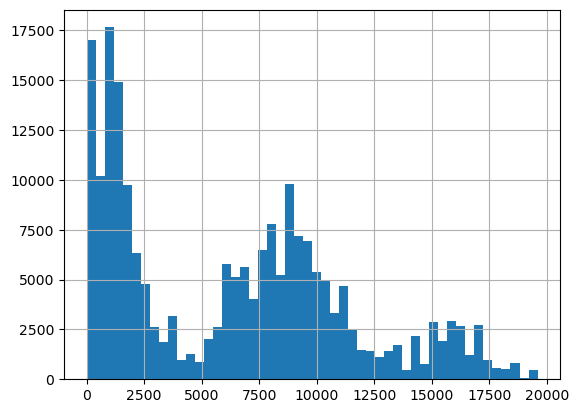

In [27]:
# Histogram of distances
df['distance_km'].hist(bins=50)

In [28]:
# Export the curated dataset
df.to_csv('/Users/max/Desktop/2609_DataVisualization/TeamProject/G20-DV4BA-Final/Q3summer_olympics_curated.csv', index=False)